<a href="https://colab.research.google.com/github/Gathrial/schneider/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataframe=pd.read_csv("/content/data.csv")
dataframe.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [6]:
import pandas as pd


file_path = input("Enter the path to your CSV file: ")


try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("❌ File not found. Please check the path and try again.")
    exit()


print("\nDataset Preview:")
print(df.head())


print("\nAvailable columns:")
print(df.columns.tolist())


target_col = input("\nEnter the name of the target column (or press Enter to auto-detect): ")

if not target_col:

    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) == 2:
            target_col = col
            print(f"✅ Auto-detected binary target column: '{target_col}'")
            break
    else:
        print("❌ No binary target column found.")
        exit()


unique_values = df[target_col].dropna().unique()
print(f"\nUnique values in '{target_col}': {unique_values}")
if len(unique_values) == 2:
    print("✅ This dataset is suitable for binary classification.")
else:
    print("❌ This is NOT a binary classification target.")



Enter the path to your CSV file: /content/data.csv

Dataset Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.104

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


file_path = input("Enter path to your CSV file: ")
df = pd.read_csv(file_path)

target_col = input("Enter the name of the target column: ")

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset.")


X = df.drop(columns=[target_col])
y = df[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data has been split and standardized.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


Enter path to your CSV file: /content/data.csv
Enter the name of the target column: diagnosis
✅ Data has been split and standardized.
Training set shape: (455, 32)
Test set shape: (114, 32)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# === Load and Inspect ===
df = pd.read_csv('/content/data.csv')

# Drop 'id' if present
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Encode 'diagnosis'
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Show initial size
print(f"Original shape: {df.shape}")

# Drop columns with >50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Drop rows with missing target (very rare, just in case)
df = df.dropna(subset=['diagnosis'])

# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Drop rows with all feature values missing (safety check)
X = X.dropna(how='all')

# Match y to new X size
y = y[X.index]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train_scaled)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))


Original shape: (569, 32)
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9649122807017544


In [21]:
pip install scikit-learn matplotlib seaborn


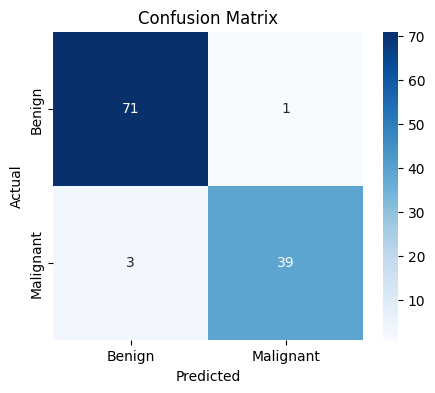


Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC Score: 0.9960


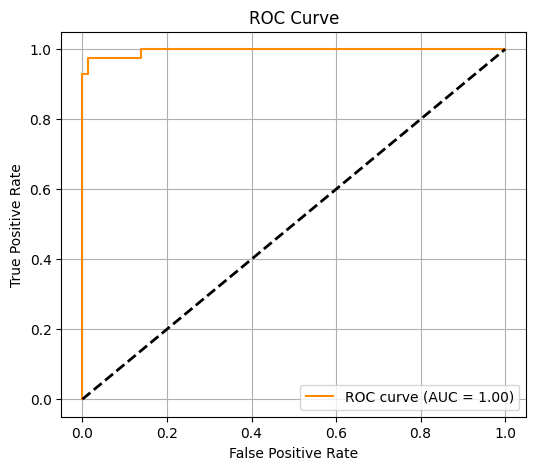

In [22]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === 2. Precision, Recall, F1 ===
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# === 3. ROC-AUC Score ===
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# === 4. Plot ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
y_pred = (y_proba >= 0.5).astype(int)



Threshold: 0.30
Precision: 0.976
Recall:    0.976
F1 Score:  0.976


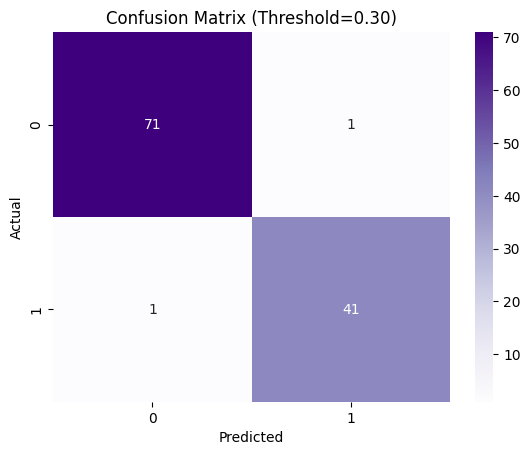


Threshold: 0.40
Precision: 0.976
Recall:    0.952
F1 Score:  0.964


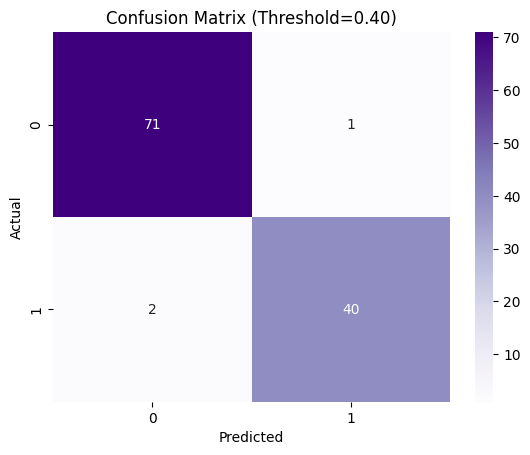


Threshold: 0.50
Precision: 0.975
Recall:    0.929
F1 Score:  0.951


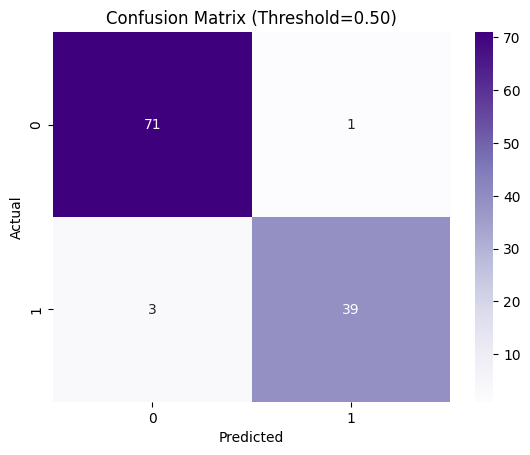


Threshold: 0.60
Precision: 1.000
Recall:    0.905
F1 Score:  0.950


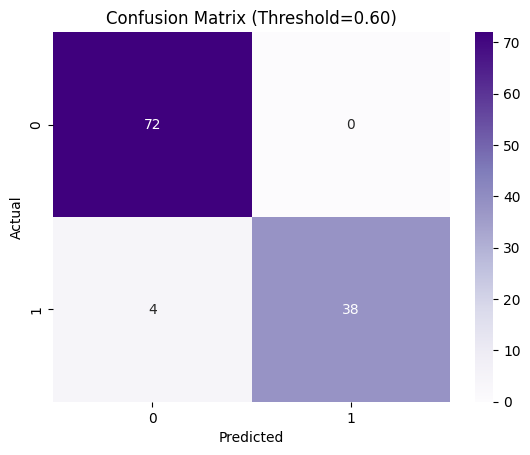


Threshold: 0.70
Precision: 1.000
Recall:    0.905
F1 Score:  0.950


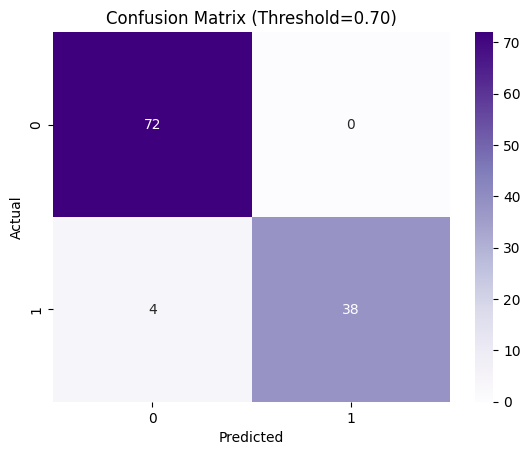

In [24]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Already predicted probabilities: y_proba

def evaluate_threshold(thresh):
    y_pred_thresh = (y_proba >= thresh).astype(int)

    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    print(f"\nThreshold: {thresh:.2f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}")

    cm = confusion_matrix(y_test, y_pred_thresh)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Threshold={thresh:.2f})")
    plt.show()

# Try thresholds from 0.3 to 0.7
for t in np.arange(0.3, 0.8, 0.1):
    evaluate_threshold(t)
